# Ungraded Lab: MNIST Deep Autoencoder

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/TensorFlow-Advanced_Techniques_Specialization/blob/master/Generative_Deep_Learning_with_TensorFlow/Week2/Labs/C4_W2_Lab_3_MNIST_DeepAutoencoder.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

Welcome back! In this lab, you will extend the shallow autoencoder you built in the previous exercise. The model here will have a deeper network so it can handle more complex images.

## Imports

In [1]:
import tensorflow as tf
from keras import layers, Model, optimizers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

## Prepare the Dataset

You will prepare the MNIST dataset just like in the previous lab.

In [2]:
def map_image(image, label):
    '''Normalizes and flattens the image. Returns image as input and label.'''
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    image = tf.reshape(image, shape=(784,))

    return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

2024-09-12 15:28:26.993899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 123 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
2024-09-12 15:28:27.004779: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 123.50MiB (129499136 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-09-12 15:28:27.004848: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 111.15MiB (116549376 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-09-12 15:28:27.004898: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 100.04MiB (104894464 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


## Build the Model

As mentioned, you will have a deeper network for the autoencoder. Compare the layers here with that of the shallow network you built in the previous lab.

In [4]:
def deep_autoencoder():
    '''Builds the encoder and decoder using Dense layers.'''
    encoder = layers.Dense(units=128, activation='relu')(inputs)
    encoder = layers.Dense(units=64, activation='relu')(encoder)
    encoder = layers.Dense(units=32, activation='relu')(encoder)

    decoder = layers.Dense(units=64, activation='relu')(encoder)
    decoder = layers.Dense(units=128, activation='relu')(decoder)
    decoder = layers.Dense(units=784, activation='sigmoid')(decoder)

    return encoder, decoder

# Set the input tensor
inputs =  layers.Input(shape=(784,))

# Get the encoder and decoder output
deep_encoder_output, deep_autoencoder_output = deep_autoencoder()

# Setup the encoder because you will visualize its output later
deep_encoder_model = Model(inputs=inputs, outputs=deep_encoder_output)

# Setup the autoencoder
deep_autoencoder_model = Model(inputs=inputs, outputs=deep_autoencoder_output)

## Compile and Train the Model

In [5]:
train_steps = 60000 // BATCH_SIZE

deep_autoencoder_model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
deep_auto_history = deep_autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50


I0000 00:00:1726176508.773129   73171 service.cc:146] XLA service 0x70d8f40034b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726176508.773164   73171 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-09-12 15:28:28.798090: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-12 15:28:28.943152: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201


 84/468 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4572

I0000 00:00:1726176510.554308   73171 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2842
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1353
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1183
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1095
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1046
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1015
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0990
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0972
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0954
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0936
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0923
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0912
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0904
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0896
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0890


## Display sample results

See the results using the model you just trained.

In [6]:
def display_one_row(disp_images, offset, shape=(28, 28)):
    '''Display sample outputs in one row.'''
    for idx, test_image in enumerate(disp_images):
        plt.subplot(3, 10, offset + idx + 1)
        plt.xticks([])
        plt.yticks([])
        test_image = np.reshape(test_image, shape)
        plt.imshow(test_image, cmap='gray')

def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8, 4)):
    '''Displays the input, encoded, and decoded output values.'''
    plt.figure(figsize=(15, 5))
    display_one_row(disp_input_images, 0, shape=(28, 28,))
    display_one_row(disp_encoded, 10, shape=enc_shape)
    display_one_row(disp_predicted, 20, shape=(28, 28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


2024-09-12 15:29:06.579396: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-09-12 15:29:06.579692: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-12 15:29:06.605473: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


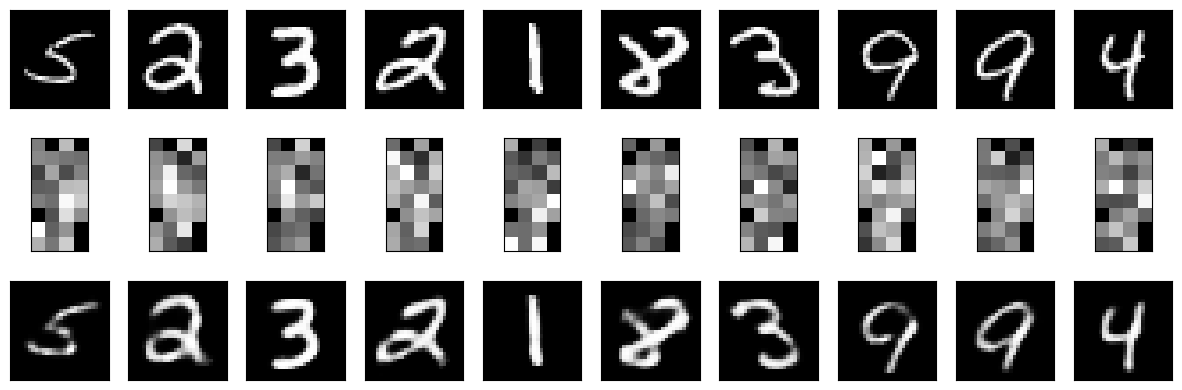

In [7]:
# Take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# Take the input images and put them in a list
output_samples = []

for input_image, image in tfds.as_numpy(test_dataset):
    output_samples = input_image

# Pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# Get the encoder output
encoded_predicted = deep_encoder_model.predict(test_dataset)

# Get a prediction for the test batch
deep_predicted = deep_autoencoder_model.predict(test_dataset)

# Display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])